conda create -n gpd python=3.9  
conda activate gpd  
conda install --channel conda-forge geopandas

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

import pd and gpd  
going to open csv files using shaply point  
going to use shaply polygon to define boxes and boundries on maps  
jupiter magic enable embedded maps and graphs in the notebook  

In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

pip install basemap  
basemap pyplot used are making nice looking custom map plots

In [3]:
from geopy.geocoders import Nominatim
from geopy.geocoders import GoogleV3

In [4]:
belgium = gpd.read_file("Belgium_shapefile/be_1km.shp")
belgium.head(15)

,CELLCODE,EOFORIGIN,NOFORIGIN,geometry
0,1kmE3768N3188,3768000,3188000,"POLYGON ((3768000.000 3188000.000, 3768000.000..."
1,1kmE3768N3189,3768000,3189000,"POLYGON ((3768000.000 3189000.000, 3768000.000..."
2,1kmE3768N3190,3768000,3190000,"POLYGON ((3768000.000 3190000.000, 3768000.000..."
3,1kmE3769N3182,3769000,3182000,"POLYGON ((3769000.000 3182000.000, 3769000.000..."
4,1kmE3769N3183,3769000,3183000,"POLYGON ((3769000.000 3183000.000, 3769000.000..."
5,1kmE3769N3184,3769000,3184000,"POLYGON ((3769000.000 3184000.000, 3769000.000..."
6,1kmE3769N3185,3769000,3185000,"POLYGON ((3769000.000 3185000.000, 3769000.000..."
7,1kmE3769N3186,3769000,3186000,"POLYGON ((3769000.000 3186000.000, 3769000.000..."
8,1kmE3769N3187,3769000,3187000,"POLYGON ((3769000.000 3187000.000, 3769000.000..."
9,1kmE3769N3188,3769000,3188000,"POLYGON ((3769000.000 3188000.000, 3769000.000..."


shp file from european environment agency:  
https://www.eea.europa.eu/data-and-maps/data/eea-reference-grids-2/gis-files/belgium-shapefile

<Axes: >

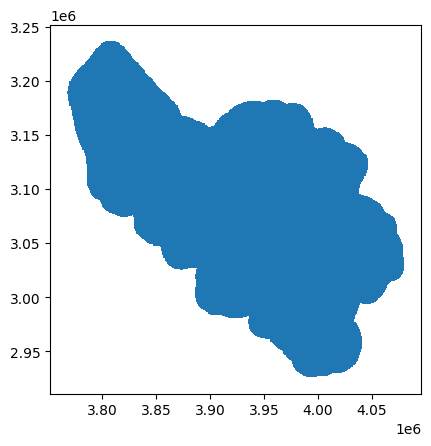

In [5]:
belgium.plot()

In [6]:
belgium2 = gpd.read_file("BEL_data_shapefile/BEL_adm0.shp")
belgium2.head(15)

,ID_0,ISO,NAME_ENGLI,NAME_ISO,NAME_FAO,NAME_LOCAL,NAME_OBSOL,NAME_VARIA,NAME_NONLA,NAME_FRENC,...,CARICOM,EU,CAN,ACP,Landlocked,AOSIS,SIDS,Islands,LDC,geometry
0,23,BEL,Belgium,BELGIUM,Belgium,Belgique|Belgie|Belgien,None,Belgique|Belgien|Belgium,None,Belgique,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((3.36583 51.36655, 3.36806 51.3..."


<Axes: >

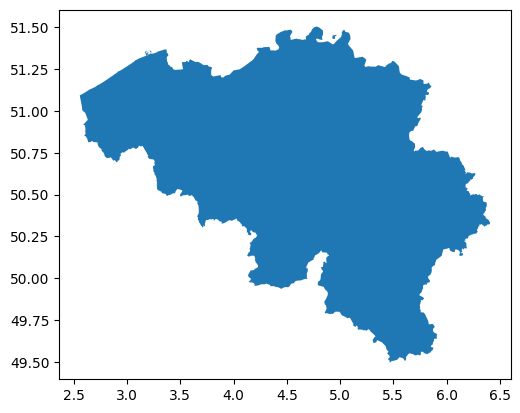

In [7]:
belgium2.plot()

To open a CSV:  
open it with pandas  
feed lon/lat to shapley  
original dataframe + geometry => geodataframe  
tell the new geodataframe that coords are lat and long  

In [18]:
#df = pd.read_csv("project/ar41_for_ulb_mini.csv", sep=';')
df = pd.read_csv("project/ar41_for_ulb.csv", sep=';')
#df = df.loc[df['mapped_veh_id'] == 172.0]
#df = df.sort_values('timestamps_UTC')
df.head()

,Unnamed: 0,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2
0,0,181.0,2023-08-01 03:44:12,50.769818,3.872114,27.0,23.0,255.0,238.0,794.0,801.0,83.0,81.0,76.0,77.0
1,1,143.0,2023-08-01 06:36:29,51.039993,3.693429,33.0,32.0,272.0,324.0,802.0,804.0,78.0,78.0,73.0,74.0
2,2,183.0,2023-08-24 06:53:54,50.742203,3.602035,31.0,33.0,234.0,182.0,799.0,802.0,82.0,82.0,85.0,87.0
3,3,177.0,2023-08-01 13:53:38,50.930914,5.327132,35.0,38.0,220.0,244.0,794.0,801.0,77.0,81.0,78.0,82.0
4,4,143.0,2023-08-24 07:02:30,51.180773,3.575259,41.0,34.0,227.0,282.0,806.0,800.0,85.0,78.0,82.0,79.0


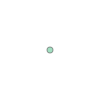

In [19]:
Point([10,10])

In [20]:
points = df.apply(lambda row: Point(row.lon, row.lat), axis=1)
points.head()

0    POINT (3.8721144 50.7698183)
1    POINT (3.6934285 51.0399934)
2    POINT (3.6020347 50.7422026)
3    POINT (5.3271318 50.9309143)
4    POINT (3.5752586 51.1807725)
dtype: object

In [21]:
trains_data = gpd.GeoDataFrame(df, geometry=points)
trains_data.crs = 'epsg:4326'
trains_data.head()

,Unnamed: 0,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,geometry
0,0,181.0,2023-08-01 03:44:12,50.769818,3.872114,27.0,23.0,255.0,238.0,794.0,801.0,83.0,81.0,76.0,77.0,POINT (3.87211 50.76982)
1,1,143.0,2023-08-01 06:36:29,51.039993,3.693429,33.0,32.0,272.0,324.0,802.0,804.0,78.0,78.0,73.0,74.0,POINT (3.69343 51.03999)
2,2,183.0,2023-08-24 06:53:54,50.742203,3.602035,31.0,33.0,234.0,182.0,799.0,802.0,82.0,82.0,85.0,87.0,POINT (3.60203 50.74220)
3,3,177.0,2023-08-01 13:53:38,50.930914,5.327132,35.0,38.0,220.0,244.0,794.0,801.0,77.0,81.0,78.0,82.0,POINT (5.32713 50.93091)
4,4,143.0,2023-08-24 07:02:30,51.180773,3.575259,41.0,34.0,227.0,282.0,806.0,800.0,85.0,78.0,82.0,79.0,POINT (3.57526 51.18077)


In [22]:
#trains_data.plot(markersize=1)
#type(trains_data)

convert to a local coordinate system for belgium: EPSG:31370  
and perform distance calculation  
https://epsg.io/31370

In [23]:
trains_data = trains_data.to_crs('EPSG:31370')
#trains_data2 = trains_data.shift() #We shift the dataframe by 1 rown down to align pnt1 with pnt2
#distances = trains_data.distance(trains_data2)
#distances

In [11]:
#type(distances)

In [12]:
#distances.to_csv('distout_EPSG_31370.csv')
#print ('file written to:')
#%pwd

extract x y coordinates and output to a CSV file

In [13]:
xy_set = trains_data.get_coordinates()

In [14]:
type(xy_set)

pandas.core.frame.DataFrame

In [15]:
xy_set.to_csv('xy_out.csv')
